In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [4]:
# Read in the 2018 data.
df = pd.read_csv('BTC-USD_stock_data.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [8]:
# Convert the `date` column to datetime.
df['Date'] = pd.to_datetime(df['Date']) 

df['Change'] = df['Close'] - df['Open']

In [9]:
#shape
df.shape

(2836, 8)

In [10]:
#check for duplicates
df.drop_duplicates().shape

(2836, 8)

In [ ]:
# Sort by Change in descending order.
df.sort_values(by='Change', ascending=False).head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Change
1499,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7309.636719
2776,2024-08-08,55030.027344,62673.765625,54766.726562,61710.136719,61710.136719,45298472567,6680.109375
2635,2024-03-20,61930.156250,68115.257812,60807.785156,67913.671875,67913.671875,66792634382,5983.515625
1884,2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,43193.234375,35690014104,5487.234375
2614,2024-02-28,57071.097656,63913.132812,56738.425781,62504.789062,62504.789062,83239156760,5433.691406
2619,2024-03-04,63137.003906,68537.031250,62386.519531,68330.414062,68330.414062,70670471105,5193.410156
2696,2024-05-20,66278.742188,71483.562500,66086.171875,71448.195312,71448.195312,43850655717,5169.453125
1576,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,4943.960938
2691,2024-05-15,61553.988281,66454.453125,61330.410156,66267.492188,66267.492188,39815167074,4713.503906
1520,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112,4471.738281


In [33]:
# Identify the locations that appear most in the dataset.
df['month'] = df['Date'].dt.strftime('%Y-%m')
df['count'] = df.groupby('month')['Date'].transform('count')

In [ ]:
#gradient
df['count'].value_counts()[:20].rename_axis('unique_values').reset_index(name='count').style.background_gradient()

,unique_values,count
0,31,1674
1,30,930
2,28,168
3,29,58
4,6,6


In [40]:
# Create two new columns.
df['week'] = df.Date.dt.isocalendar().week
df['weekday'] = df.Date.dt.day_name()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,week,month,count,weekday
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,34.666992,52,2017-01,31,Sunday
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,23.132996,1,2017-01,31,Monday
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,22.239990,1,2017-01,31,Tuesday
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,110.329956,1,2017-01,31,Wednesday
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-143.349976,1,2017-01,31,Thursday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We will use the `groupby()` function to do this.

In [41]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','count']].groupby(['weekday']).mean()

,count
weekday,
Friday,30.390123
Monday,30.456790
Saturday,30.385185
Sunday,30.394089
Thursday,30.385185
Tuesday,30.397531
Wednesday,30.395062


In [42]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

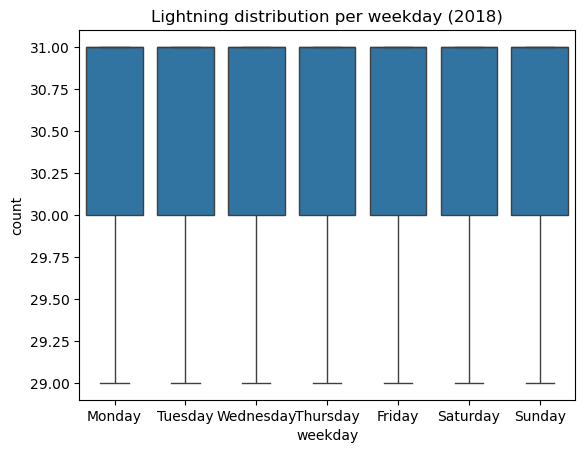

In [43]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='count', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

In [45]:
# Import 2016–2017 data
df_2 = pd.read_csv('BTC-USD_stock_data.csv')
df_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [46]:
# Convert `date` column to datetime.
df_2['Date'] = pd.to_datetime(df_2['Date'])

In [47]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,month,count
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,34.666992,2017-01,31.0
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,23.132996,2017-01,31.0
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,22.239990,2017-01,31.0
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,110.329956,2017-01,31.0
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-143.349976,2017-01,31.0


In [49]:
# Add 3 new columns.
union_df['year'] = union_df.Date.dt.year
union_df['month'] = union_df.Date.dt.month
union_df['month_txt'] = union_df.Date.dt.month_name()
union_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,month,count,year,month_txt
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,34.666992,1,31.0,2017,January
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,23.132996,1,31.0,2017,January
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,22.239990,1,31.0,2017,January
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,110.329956,1,31.0,2017,January
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-143.349976,1,31.0,2017,January


In [ ]:
union_df[['year','count']].groupby(['year']).sum()

,count
year,
2017,11111.0
2018,11111.0
2019,11111.0
2020,11168.0
2021,11111.0
2022,11111.0
2023,11111.0
2024,8382.0


In [52]:
# Calculate total lightning strikes for each month of each year.
count_by_month = union_df.groupby(['month_txt','year']).agg(
    count = pd.NamedAgg(column='count',aggfunc=sum)
    ).reset_index()

count_by_month.head()

,month_txt,year,count
0,April,2017,900.0
1,April,2018,900.0
2,April,2019,900.0
3,April,2020,900.0
4,April,2021,900.0


In [54]:
# Calculate total lightning strikes for each year.
count_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='count',aggfunc=sum)
).reset_index()

count_by_year.head()

,year,year_strikes
0,2017,11111.0
1,2018,11111.0
2,2019,11111.0
3,2020,11168.0
4,2021,11111.0


In [55]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_count = count_by_month.merge(count_by_year,on='year')
percentage_count.head()

,month_txt,year,count,year_strikes
0,April,2017,900.0,11111.0
1,August,2017,961.0,11111.0
2,December,2017,961.0,11111.0
3,February,2017,784.0,11111.0
4,January,2017,961.0,11111.0


In [58]:
percentage_count['percentage_count_per_month'] = (percentage_count['count'] / percentage_count['count'].sum()) * 100


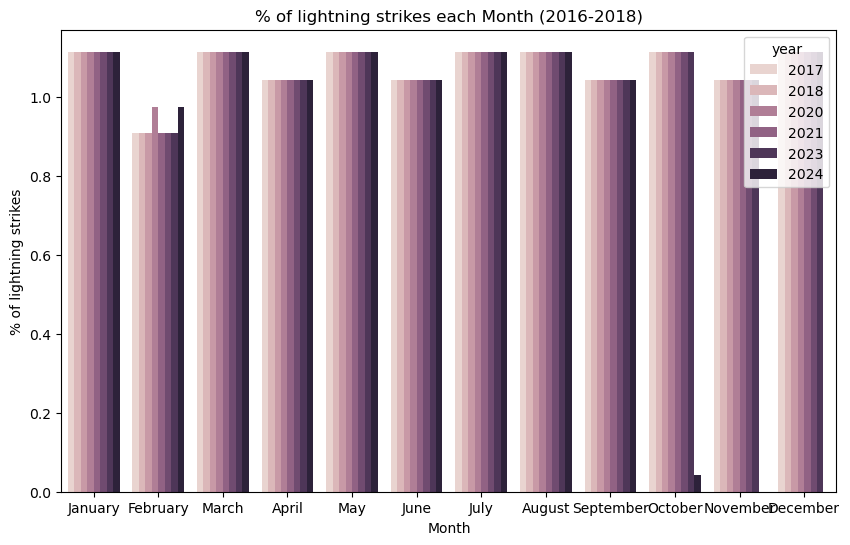

In [59]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_count,
    x = 'month_txt',
    y = 'percentage_count_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");